In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

from itertools import product as pr
import import_ipynb
import TimeSeriesFunctions as tsf

importing Jupyter notebook from TimeSeriesFunctions.ipynb


In [2]:
shops=pd.read_csv('shops.csv')

In [3]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [2]:
sales=pd.read_csv('sales_train_v2.csv')
item_cat=pd.read_csv('item_categories.csv')
shops=pd.read_csv('shops.csv')
item=pd.read_csv('items.csv')


In [3]:
dfs=[sales,item_cat,shops,item]

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

for d in dfs:
    name=get_df_name(d)
    print('************',name,'************')
    print('')
    print('columns:{}'.format(d.columns.values))
    print('shape:',d.shape)
    print('')
    print('_____')
    print(d.head(3))
    print('_____ \n')
    

************ sales ************

columns:['date' 'date_block_num' 'shop_id' 'item_id' 'item_price' 'item_cnt_day']
shape: (2935849, 6)

_____
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154       999.0           1.0
1  03.01.2013               0       25     2552       899.0           1.0
2  05.01.2013               0       25     2552       899.0          -1.0
_____ 

************ item_cat ************

columns:['item_category_name' 'item_category_id']
shape: (84, 2)

_____
        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
_____ 

************ shops ************

columns:['shop_name' 'shop_id']
shape: (60, 2)

_____
                       shop_name  shop_id
0  !Якутск Орджоникидзе, 56 фран        0
1  !Якутск ТЦ "Центральный" фран        1
2               Адыгея ТЦ "Мега"        2
___

# Data Understanding

### sales 

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [5]:
cols=sales.columns

print('sales (shape:{}) \nduplicates: abs:{}, rel:{}\n\n'.format(sales.shape,sales.duplicated().sum(),sales.duplicated().sum()/sales.shape[0]))

for c in cols:
    print('*****',c,'*****\n')
    print('--null values-- \nabs:{}, rel:{}'.format(sales[c].isna().sum(), sales[c].isna().sum()/sales.shape[0]))
    print('\n--unique values--\n',len(sales[c].unique()))
    print('______________________________ \n')

sales (shape:(2935849, 6)) 
duplicates: abs:6, rel:2.0437018388888528e-06


***** date *****

--null values-- 
abs:0, rel:0.0

--unique values--
 1034
______________________________ 

***** date_block_num *****

--null values-- 
abs:0, rel:0.0

--unique values--
 34
______________________________ 

***** shop_id *****

--null values-- 
abs:0, rel:0.0

--unique values--
 60
______________________________ 

***** item_id *****

--null values-- 
abs:0, rel:0.0

--unique values--
 21807
______________________________ 

***** item_price *****

--null values-- 
abs:0, rel:0.0

--unique values--
 19993
______________________________ 

***** item_cnt_day *****

--null values-- 
abs:0, rel:0.0

--unique values--
 198
______________________________ 



In [6]:
date_str=[dt.datetime.strptime(sales.date[x],'%d.%m.%Y').strftime('%Y/%m/%d') for x in range(0,len(sales.date))]

In [7]:
sales['date']=date_str

In [8]:
sales[sales.duplicated(keep=False)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76961,2013/01/05,0,54,20130,149.0,1.0
76962,2013/01/05,0,54,20130,149.0,1.0
1435365,2014/02/23,13,50,3423,999.0,1.0
1435367,2014/02/23,13,50,3423,999.0,1.0
1496765,2014/03/23,14,21,3423,999.0,1.0
1496766,2014/03/23,14,21,3423,999.0,1.0
1671872,2014/05/01,16,50,3423,999.0,1.0
1671873,2014/05/01,16,50,3423,999.0,1.0
1866322,2014/07/12,18,25,3423,999.0,1.0
1866340,2014/07/12,18,25,3423,999.0,1.0


In [9]:
sales.drop_duplicates(inplace=True)
sales.shape

(2935843, 6)

In [10]:
print('total negative tuples (renders): abs:{}, rel:{}'.format(sales[sales['item_cnt_day']<0].shape[0],\
                                                    sales[sales['item_cnt_day']<0].shape[0]/sales.shape[0]))

total negative tuples (renders): abs:7356, rel:0.0025055835751434936


In [11]:
sales['tot_revenues']=sales['item_price']*sales['item_cnt_day']
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,tot_revenues
0,2013/01/02,0,59,22154,999.00,1.0,999.00
1,2013/01/03,0,25,2552,899.00,1.0,899.00
2,2013/01/05,0,25,2552,899.00,-1.0,-899.00
3,2013/01/06,0,25,2554,1709.05,1.0,1709.05
4,2013/01/15,0,25,2555,1099.00,1.0,1099.00


In [12]:
sales.reset_index(inplace=True)
sales.drop(['index'],1,inplace=True)

In [13]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,tot_revenues
0,2013/01/02,0,59,22154,999.00,1.0,999.00
1,2013/01/03,0,25,2552,899.00,1.0,899.00
2,2013/01/05,0,25,2552,899.00,-1.0,-899.00
3,2013/01/06,0,25,2554,1709.05,1.0,1709.05
4,2013/01/15,0,25,2555,1099.00,1.0,1099.00


#### graphical representation

In [14]:
tsf.documentation.package_functions()

***************************************
************ Preprocessing ************
***************************************
1. date_plot
2. lags
3. trends
4. split_date
********************************
************ Models ************
********************************
1. get_gridsearch_bestpars
2. modeling
3. metrics_score


In [15]:
dt_plt=tsf.preprocessing.date_plot
print(dt.__doc__)

Fast implementation of the datetime type.


In [16]:
sales['sDate']=[dt.datetime.strptime(sales.date[x],'%Y/%m/%d').strftime('%Y/%m')\
                       for x in range(0,len(sales.date))]

In [17]:
date_grouped=sales[['sDate','item_cnt_day','tot_revenues']].groupby('sDate').sum()
date_grouped.reset_index(inplace=True)

#scaler=StandardScaler()
#scaler=MinMaxScaler()
#standard=date_grouped[['item_cnt_day','tot_revenues']]
#standard=scaler.fit_transform(standard)
#date_grouped[['item_cnt_day','tot_revenues']]=standard

date_grouped.shape

(34, 3)

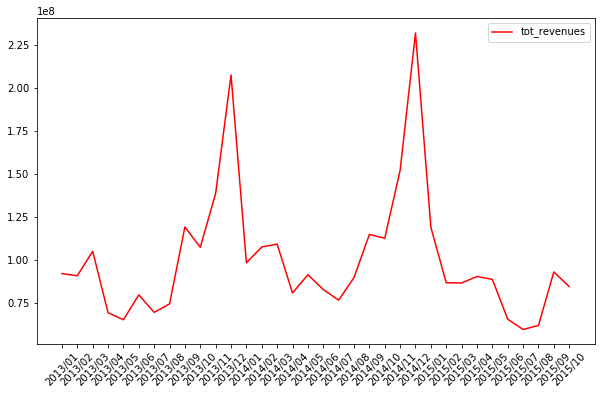

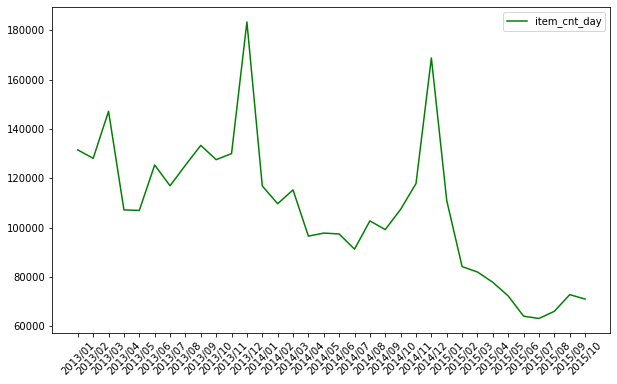

In [18]:
revenues=dt_plt(date_grouped['sDate'],date_grouped[['tot_revenues']],['r'],x_size=10,y_size=6)
tot_item=dt_plt(date_grouped['sDate'],date_grouped[['item_cnt_day']],['g'],x_size=10,y_size=6)

the total number of items sold per months seems to show a decreasing trend... is it true? <br>
at the same time also the revenues might have been affected due to this decrease.

In [19]:
date_grouped[['year','month']]= date_grouped['sDate'].str.split("/", n = 2, expand = True)
date_grouped.head()

,sDate,item_cnt_day,tot_revenues,year,month
0,2013/01,131478.0,9.194694e+07,2013,01
1,2013/02,128090.0,9.066571e+07,2013,02
2,2013/03,147142.0,1.049327e+08,2013,03
3,2013/04,107190.0,6.915429e+07,2013,04
4,2013/05,106970.0,6.506531e+07,2013,05


In [20]:
yr1=date_grouped[date_grouped['year']=='2013'][['tot_revenues','item_cnt_day']].reset_index()
yr2=date_grouped[date_grouped['year']=='2014'][['tot_revenues','item_cnt_day']].reset_index()
yr3=date_grouped[date_grouped['year']=='2015'][['tot_revenues','item_cnt_day']].reset_index()

tot_rev=pd.concat([yr1['tot_revenues'],yr2['tot_revenues'],yr3['tot_revenues']],1)
tot_rev.columns=['2013','2014','2015']


tot_rev['ratio1']=(tot_rev['2014']-tot_rev['2013'])/tot_rev['2014']
tot_rev['ratio2']=(tot_rev['2015']-tot_rev['2014'])/tot_rev['2015']

tot_rev[['ratio1','ratio2']]

,ratio1,ratio2
0,0.063925,0.174069
1,0.156049,-0.240620
2,0.038324,-0.261784
3,0.142557,0.106380
4,0.287196,-0.030519
5,0.037718,-0.264084
6,0.093301,-0.287533
7,0.170819,-0.451103
8,-0.037990,-0.234846
9,0.046957,-0.334235


In [21]:
count_days=pd.concat([yr1['item_cnt_day'],yr2['item_cnt_day'],yr3['item_cnt_day']],1)
count_days.columns=['2013','2014','2015']

count_days['ratio1']=(count_days['2014']-count_days['2013'])/count_days['2014']
count_days['ratio2']=(count_days['2015']-count_days['2014'])/count_days['2015']

count_days[['ratio1','ratio2']]

,ratio1,ratio2
0,-0.124714,-0.053419
1,-0.167788,-0.302715
2,-0.276211,-0.405809
3,-0.110133,-0.240649
4,-0.093886,-0.352638
5,-0.286896,-0.519621
6,-0.281412,-0.444585
7,-0.219721,-0.554518
8,-0.343964,-0.361943
9,-0.187289,-0.511794


Qualitative: with a quick ratio, we can see that both the revenues and the number of items sold show a decreasing trend as expected 

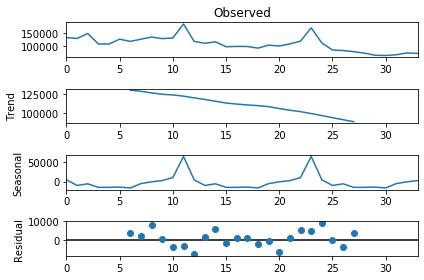

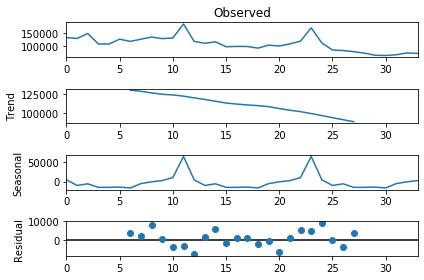

In [22]:
date_grouped['sDate']=LabelEncoder().fit_transform(date_grouped['sDate'])
rev=date_grouped[['item_cnt_day']]
revenues=sm.tsa.seasonal_decompose(rev.values,period=12, model='additive')
revenues.plot()

### shops

In [23]:
shops.head(3)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2


In [24]:
shops['city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск'

shops['city_code'] = LabelEncoder().fit_transform(shops['city'])
shops = shops[['shop_id','city_code']]

In [25]:
shops.head(3)

,shop_id,city_code
0,0,29
1,1,29
2,2,0


### item_cat

In [26]:
#item_cat=pd.read_csv('item_categories.csv')
item_cat.head(3)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2


In [27]:
print(len(item_cat.item_category_name.unique()))
#item_cat.item_category_name.unique()

84


In [28]:
item_cat[['category','subtype']]= item_cat['item_category_name'].str.split(" - ", n = 2, expand = True)
item_cat.fillna('',inplace=True)
item_cat['subtype'] = np.where(item_cat['subtype'] =='', item_cat['category'], item_cat['subtype'])

item_cat=item_cat[['item_category_id','category','subtype']]

In [29]:
item_cat['category']=LabelEncoder().fit_transform(item_cat['category'])
item_cat['subtype']=LabelEncoder().fit_transform(item_cat['subtype'])

item_cat.head(3)

C:\Users\Utente\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Utente\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,item_category_id,category,subtype
0,0,0,31
1,1,1,11
2,2,1,12


### item

In [30]:
item.head(3)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40


In [31]:
item=item[['item_id','item_category_id']]

## Merging

In [32]:
sales.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,tot_revenues,sDate
0,2013/01/02,0,59,22154,999.0,1.0,999.0,2013/01
1,2013/01/03,0,25,2552,899.0,1.0,899.0,2013/01
2,2013/01/05,0,25,2552,899.0,-1.0,-899.0,2013/01


In [33]:
len(sales.item_id.unique())

21807

N.B. **important**: we need to create a matrix in which to insert all the possible dates,shops and items sold. in this way we can really see the trends over time per each line 

In [34]:
mat=[]
for i in range(34):
    ls=sales[sales['date_block_num']==i]
    mat.append(np.array(list(pr([i],ls.shop_id.unique(),ls.item_id.unique()))))

In [35]:
df_mat=pd.DataFrame(np.vstack(mat),columns=['datecode','shop_id','item_id'])
df_mat['shop_id']=df_mat['shop_id'].astype(np.int8)
df_mat['item_id']=df_mat['item_id'].astype(np.int16)
df_mat['datecode']=df_mat['datecode'].astype(np.int8)

print(df_mat.shape)
print(df_mat.head(3))
df_mat.info()

(10913850, 3)
   datecode  shop_id  item_id
0         0       59    22154
1         0       59     2552
2         0       59     2554
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10913850 entries, 0 to 10913849
Data columns (total 3 columns):
datecode    int8
shop_id     int8
item_id     int16
dtypes: int16(1), int8(2)
memory usage: 41.6 MB


In [36]:
### aggregate sales for revenues and total item sold
data=sales.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day': ['sum'],'tot_revenues':['sum']}).reset_index()

In [37]:
data.columns=['datecode','shop_id','item_id','item_count','tot_revenues']

In [38]:
df=pd.DataFrame()

In [39]:
df=df_mat.merge(data, how='left',left_on=['datecode','shop_id','item_id'],
               right_on=['datecode','shop_id','item_id'])


In [40]:
df=df.merge(item,how='left',on='item_id')
df=df.merge(item_cat,how='left',on='item_category_id')
df=df.merge(shops,how='left',on='shop_id')


In [41]:
df=df[['datecode','shop_id','city_code','item_id','item_category_id','category','subtype','item_count','tot_revenues']]
df.columns=['datecode','shop_id','city_code','item_id','item_category_id','type','subtype','item_count','tot_revenues']
df.fillna(0,inplace=True)

In [42]:
df['item_count']=df.item_count.astype(np.int32)
print(df.head(3))
df.info()

   datecode  shop_id  city_code  item_id  item_category_id  type  subtype  \
0         0       59         30    22154                37    11        1   
1         0       59         30     2552                58    13       29   
2         0       59         30     2554                58    13       29   

   item_count  tot_revenues  
0           1         999.0  
1           0           0.0  
2           0           0.0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10913850 entries, 0 to 10913849
Data columns (total 9 columns):
datecode            int8
shop_id             int8
city_code           int32
item_id             int16
item_category_id    int64
type                int32
subtype             int32
item_count          int32
tot_revenues        float64
dtypes: float64(1), int16(1), int32(4), int64(1), int8(2)
memory usage: 458.0 MB


In [43]:
df[df.duplicated()]

,datecode,shop_id,city_code,item_id,item_category_id,type,subtype,item_count,tot_revenues


In [44]:
df.head()

,datecode,shop_id,city_code,item_id,item_category_id,type,subtype,item_count,tot_revenues
0,0,59,30,22154,37,11,1,1,999.0
1,0,59,30,2552,58,13,29,0,0.0
2,0,59,30,2554,58,13,29,0,0.0
3,0,59,30,2555,56,13,5,0,0.0
4,0,59,30,2564,59,13,42,0,0.0


### Temporal Lags and Trends over item counts 

In [45]:
def lag_feature(df, lags, col):
    tmp = df[['datecode','shop_id','item_id',col]]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['datecode','shop_id','item_id', col+'_lag_'+str(i)]
        shifted['datecode'] += i
        df = pd.merge(df, shifted, on=['datecode','shop_id','item_id'], how='left')
    return df

In [46]:
#lag produced on item_count
df=lag_feature(df,[1,2,3,6,12],'item_count')

In [47]:
#df.fillna(0,inplace=True)
##rate
#for i in [1,2,3,6,12]:
#    df['rate_'+str(i)]=(df['item_count']-df['item_count_lag_'+str(i)])/df['item_count_lag_'+str(i)]
#
#df.replace(np.inf,0,inplace=True)
#df.replace(-(np.inf),0,inplace=True)
#df.fillna(0,inplace=True)

### compute means 

In [48]:
df.head()

,datecode,shop_id,city_code,item_id,item_category_id,type,subtype,item_count,tot_revenues,item_count_lag_1,item_count_lag_2,item_count_lag_3,item_count_lag_6,item_count_lag_12
0,0,59,30,22154,37,11,1,1,999.0,NaN,NaN,NaN,NaN,NaN
1,0,59,30,2552,58,13,29,0,0.0,NaN,NaN,NaN,NaN,NaN
2,0,59,30,2554,58,13,29,0,0.0,NaN,NaN,NaN,NaN,NaN
3,0,59,30,2555,56,13,5,0,0.0,NaN,NaN,NaN,NaN,NaN
4,0,59,30,2564,59,13,42,0,0.0,NaN,NaN,NaN,NaN,NaN


In [49]:
### mean and sum
city=df.groupby(['datecode','city_code','item_id']).agg({'item_count':['mean']})
city.reset_index(inplace=True)
shop=df.groupby(['datecode','shop_id']).agg({'item_count':['mean']})
shop.reset_index(inplace=True)
item_type=df.groupby(['datecode','type']).agg({'item_count':['mean']})
item.reset_index(inplace=True)
subtype=df.groupby(['datecode','subtype']).agg({'item_count':['mean']})
subtype.reset_index(inplace=True)

In [50]:
df=df.merge(city,on=['datecode','city_code','item_id'],how='left')
df=df.merge(shop,on=['datecode','shop_id'],how='left')
df=df.merge(item_type,on=['datecode','type'],how='left')
df=df.merge(subtype,on=['datecode','subtype'],how='left')


C:\Users\Utente\Miniconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\Utente\Miniconda3\lib\site-packages\pandas\core\generic.py:3802: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [54]:
df.tail()

,datecode,shop_id,city_code,item_id,item_category_id,type,subtype,item_count,tot_revenues,item_count_lag_1,item_count_lag_2,item_count_lag_3,item_count_lag_6,item_count_lag_12,"('item_count', 'mean')_x","('item_count', 'mean')_x","('item_count', 'mean')_x","(item_count, mean)"
10913845,33,21,13,7635,64,14,44,0,0.0,NaN,NaN,NaN,NaN,NaN,0.125,0.353224,0.313354,0.155691
10913846,33,21,13,7638,64,14,44,0,0.0,NaN,NaN,NaN,NaN,NaN,0.125,0.353224,0.313354,0.155691
10913847,33,21,13,7640,64,14,44,0,0.0,NaN,NaN,NaN,NaN,NaN,0.125,0.353224,0.313354,0.155691
10913848,33,21,13,7632,64,14,44,0,0.0,0.0,NaN,0.0,0.0,NaN,0.125,0.353224,0.313354,0.155691
10913849,33,21,13,7440,57,13,10,0,0.0,0.0,0.0,0.0,0.0,NaN,0.125,0.353224,0.147069,0.062672


In [57]:
df.columns=['datecode','shop_id','city_code','item_id','item_category_id', 'type','subtype', 
            'item_count','tot_revenues', 'item_count_lag_1','item_count_lag_2','item_count_lag_3',
            'item_count_lag_6','item_count_lag_12','city_mean', 'shop_mean','item_type_mean', 'subtype_mean']

In [58]:
#df.to_csv('Data.csv')